In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [5]:
SAMPLE_LENGTHS = [3, 6, 11, 31, 101]
M_RUNS = 50
CORRELATIONS = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8]
EXTINCTION_RATES = [0, 0.5, 1.]
RBF_SIGMAS = [0.5, 1., 4., 6., 8.]
DYADIC_ORDERS = [0, 2, 4]
A=[0., 0.2, 0.5, 0.8]

KERNELS_NORMALIZED = [ ('', None) ] 
KERNELS_NORMALIZED += [ ('', sigma) for sigma in RBF_SIGMAS ]
KERNELS_UNNORMALIZED = [ ('', None) ] 
KERNELS_UNNORMALIZED += [ ('', sigma) for sigma in RBF_SIGMAS ]

In [6]:
with open('pickles/intermediate_results_2022-04-25T09.46.58.891603.pickle', 'rb') as f:
    res = pickle.load(f)

In [7]:
runs = [m for m in range(M_RUNS)]

In [10]:
def fix_res(res):
    len_iter = len(EXTINCTION_RATES)*(len(KERNELS_UNNORMALIZED) + len(KERNELS_NORMALIZED))*len(runs)*len(DYADIC_ORDERS)
    len_iter += len(CORRELATIONS)*(len(KERNELS_UNNORMALIZED) + len(KERNELS_NORMALIZED))*len(runs)*len(DYADIC_ORDERS)
    
    for i, (sl, a) in enumerate(product(SAMPLE_LENGTHS, A)): # DIFF PROD HERE
        for k, (ext_rate, (ukernel, ukernel_param), run, order) in enumerate(product(EXTINCTION_RATES, KERNELS_NORMALIZED + KERNELS_UNNORMALIZED, runs, DYADIC_ORDERS)):
            if i*len_iter + k >= len(res):
                return None
            else:
                assert res[i*len_iter + k]['process_type'] == 'extinct_gaussian', "at {}".format(i*len_iter + k)
                res[i*len_iter + k]['sample_length'] = sl
                res[i*len_iter + k]['process_param'] = ext_rate
        for l, (corr, (ukernel, ukernel_param), run, order) in enumerate(product(CORRELATIONS, KERNELS_NORMALIZED + KERNELS_UNNORMALIZED, runs, DYADIC_ORDERS)):
            if i*len_iter + k + l + 1 >= len(res):
                return None
            else:
                assert res[i*len_iter + k + l + 1]['process_type'] == 'lin_corr', "at {}".format(i*len_iter + k + l +1)
                res[i*len_iter + k + l + 1]['sample_length'] = sl
                res[i*len_iter + k + l + 1]['process_param'] = corr

In [11]:
fix_res(res)

In [12]:
df = pd.DataFrame(res)

In [13]:
nice_df = df.set_index(['kernel_type', 'kernel_param', 'dyadic_order', 'process_type', 'a', 'process_param', 'sample_length'])

In [14]:
nice_df.index.unique()

MultiIndex([(  'normalized', nan, 0, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', nan, 2, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', nan, 4, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 0.5, 0, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 0.5, 2, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 0.5, 4, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 1.0, 0, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 1.0, 2, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 1.0, 4, 'extinct_gaussian', 0.0, 0.0, 3),
            (  'normalized', 4.0, 0, 'extinct_gaussian', 0.0, 0.0, 3),
            ...
            ('unnormalized', 1.0, 4,         'lin_corr', 0.0, 0.2, 6),
            ('unnormalized', 4.0, 0,         'lin_corr', 0.0, 0.2, 6),
            ('unnormalized', 4.0, 2,         'lin_corr', 0.0, 0.2, 6),
            ('unnormalized', 4.0, 4,         'lin_corr', 0.0,

/home/ocmob/miniconda3/envs/signatures/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

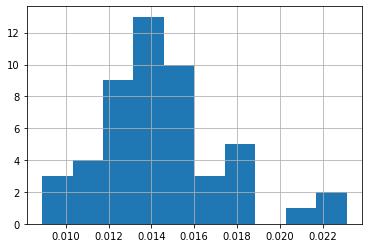

In [15]:
nice_df.loc[('normalized', 4.0, 0, 'extinct_gaussian', 0.0, 0.0, 3)]['hsic_score'].hist()